In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.5 MB/s eta 0:00:00


In [3]:
! pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/83/8d/f65f8138365462ace54458a9e164f4b28ce1141361970190eef36bdef986/transformers-4.32.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.15.1 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.0 MB/s eta 0:00:00
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/6c/f0/c17bbdb1e5f9dab29d44cade445135789f75f8f08ea2728d04493ea8412b/safetensors-0.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.7 MB/s

#BART

In [ ]:
!pip install translate

In [ ]:
from translate import Translator

def translate_portuguese_to_english(text):
    translator = Translator(from_lang="pt", to_lang="en")
    translation = translator.translate(text)
    return translation

# Test the translation
portuguese_text = "Há um vazamento de esgoto no parque da cidade. O odor é muito forte e está afetando a experiência dos visitantes. É importante resolver esse problema para garantir a saúde e o bem-estar de todos. Solicitamos à prefeitura que envie uma equipe de manutenção para corrigir o vazamento e realizar a limpeza necessária."
english_translation = translate_portuguese_to_english(portuguese_text)
print(english_translation)


There's a sewer leak in the city park. The odor is very strong and is affecting the visitor experience. It is important to address this issue to ensure the health and well-being of all. We request the city to send a maintenance team to correct the leak and carry out the necessary cleaning.


In [ ]:
from transformers import pipeline

classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

labels = ["Public Safety", "Infrastructure Issues", "Environmental Concerns", "Traffic and Transportation", "Noise and Nuisance", "Public Health", "Parks and Recreation", "Zoning and Land Use", "Community Events and Programs", "Civic Services"]
hypothesis_template = 'This text is about {}.'
sequence = "Os meus vizinhos estão a fazer uma festa e está muita algazarra, podem acabar com o barulho?"

prediction = classifier(english_translation, labels, hypothesis_template=hypothesis_template, multi_label=True)

print(prediction)

{'sequence': "There's a sewer leak in the city park. The odor is very strong and is affecting the visitor experience. It is important to address this issue to ensure the health and well-being of all. We request the city to send a maintenance team to correct the leak and carry out the necessary cleaning.", 'labels': ['Environmental Concerns', 'Infrastructure Issues', 'Civic Services', 'Parks and Recreation', 'Public Health', 'Community Events and Programs', 'Public Safety', 'Noise and Nuisance', 'Traffic and Transportation', 'Zoning and Land Use'], 'scores': [0.9529522657394409, 0.8248317837715149, 0.7700615525245667, 0.70140141248703, 0.48067110776901245, 0.09921447187662125, 0.087827168405056, 0.039920512586832047, 0.013730679638683796, 0.012367946095764637]}


#mDeBERTa

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")
sequence_to_classify = "Há um vazamento de esgoto no parque da cidade. O odor é muito forte e está afetando a experiência dos visitantes.\
 É importante resolver esse problema para garantir a saúde e o bem-estar de todos. Solicitamos à prefeitura que envie uma equipe de \
 manutenção para corrigir o vazamento e realizar a limpeza necessária."
candidate_labels = ["Public Safety", "Infrastructure Issues", "Environmental Concerns",
                    "Traffic and Transportation", "Noise and Nuisance", "Public Health", "Parks and Recreation",
                    "Zoning and Land Use", "Community Events and Programs", "Civic Services"]
output = classifier(sequence_to_classify, candidate_labels, multi_label=True)

for label, score in zip(output["labels"], output["scores"]):
    print(f"Label: {label}, Score: {score:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Label: Environmental Concerns, Score: 0.9992
Label: Noise and Nuisance, Score: 0.9957
Label: Infrastructure Issues, Score: 0.9604
Label: Civic Services, Score: 0.9335
Label: Parks and Recreation, Score: 0.8364
Label: Public Health, Score: 0.7679
Label: Community Events and Programs, Score: 0.6811
Label: Zoning and Land Use, Score: 0.1037
Label: Public Safety, Score: 0.0576
Label: Traffic and Transportation, Score: 0.0035


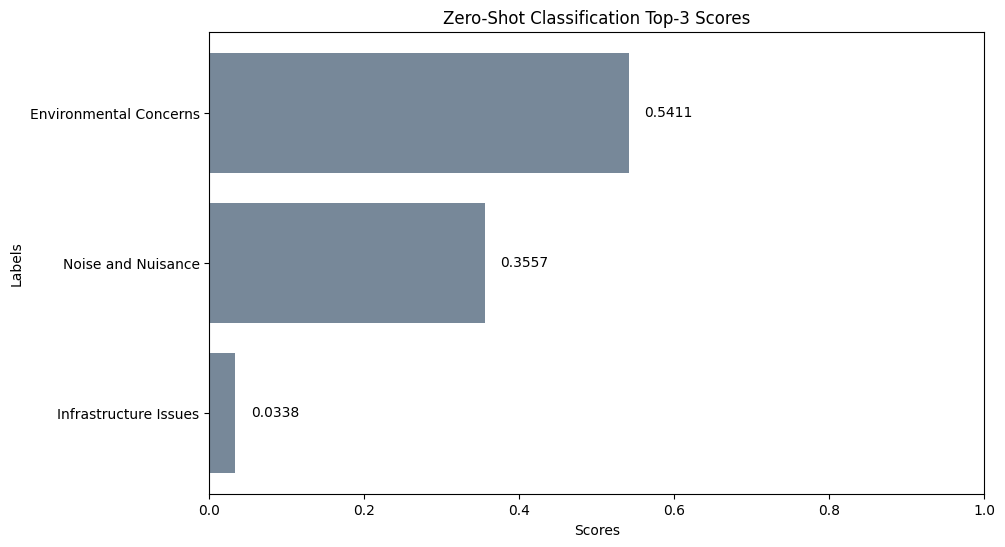

In [ ]:
import matplotlib.pyplot as plt

# Your code for classification
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")
sequence_to_classify = "Há um vazamento de esgoto no parque da cidade. O odor é muito forte e está afetando a experiência dos visitantes. É importante resolver esse problema para garantir a saúde e o bem-estar de todos. Solicitamos à prefeitura que envie uma equipe de manutenção para corrigir o vazamento e realizar a limpeza necessária."
candidate_labels = ["Public Safety", "Infrastructure Issues", "Environmental Concerns",
                    "Traffic and Transportation", "Noise and Nuisance", "Public Health", "Parks and Recreation",
                    "Zoning and Land Use", "Community Events and Programs", "Civic Services"]
output = classifier(sequence_to_classify, candidate_labels)

# Extract labels and scores
labels = output["labels"][:3]
scores = output["scores"][:3]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, scores, color='lightslategray')
plt.xlabel('Scores')
plt.ylabel('Labels')
plt.title('Zero-Shot Classification Top-3 Scores')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

# Annotate bars with values
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{score:.4f}', va='center')

plt.show()


# Ensemble

In [13]:
from transformers import pipeline

# Create a zero-shot classification pipeline for mDeBERTa
mdeberta_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

# Create a zero-shot classification pipeline for BART
bart_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Input text
input_text = "Há um vazamento de esgoto no parque da cidade. O odor é muito forte e está afetando a experiência dos visitantes. É importante resolver esse problema para garantir a saúde e o bem-estar de todos. Solicitamos à prefeitura que envie uma equipe de manutenção para corrigir o vazamento e realizar a limpeza necessária."

# Labels
labels = ["Public Safety", "Infrastructure Issues", "Environmental Concerns", "Traffic and Transportation", "Noise and Nuisance", "Public Health", "Parks and Recreation", "Zoning and Land Use", "Community Events and Programs", "Civic Services"]

# Perform zero-shot classification with mDeBERTa
mdeberta_result = mdeberta_classifier(input_text, labels)

# Perform zero-shot classification with BART
bart_result = bart_classifier(input_text, labels)

# Calculate the mean of the results
mdeberta_scores = mdeberta_result["scores"]
bart_scores = bart_result["scores"]

mean_scores = [(m + b) / 2 for m, b in zip(mdeberta_scores, bart_scores)]

# Get the label with the highest mean score
final_label_index = mean_scores.index(max(mean_scores))
final_label = labels[final_label_index]

ensemble_result = {
    "sequence": input_text,
    "mdeberta_classification": mdeberta_result["labels"][0],
    "bart_classification": bart_result["labels"][0],
    "final_classification": final_label
}

print(ensemble_result)


{'sequence': 'Há um vazamento de esgoto no parque da cidade. O odor é muito forte e está afetando a experiência dos visitantes. É importante resolver esse problema para garantir a saúde e o bem-estar de todos. Solicitamos à prefeitura que envie uma equipe de manutenção para corrigir o vazamento e realizar a limpeza necessária.', 'mdeberta_classification': 'Environmental Concerns', 'bart_classification': 'Noise and Nuisance', 'final_classification': 'Public Safety'}


In [ ]:
from transformers import pipeline

# Create a zero-shot classification pipeline for mDeBERTa
mdeberta_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",device=0)

# Create a zero-shot classification pipeline for BART
bart_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli",device=0)

labels = data_sample['Industry'].unique()
sentences = data_sample['Description']


k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)
true_labels = []
predicted_labels = []

for index, row in data_sample.iterrows():
  # Perform zero-shot classification with mDeBERTa
  mdeberta_result = mdeberta_classifier(row["Description"], labels.tolist())

  # Perform zero-shot classification with BART
  bart_result = bart_classifier(row["Description"], labels.tolist())

  # Create a mapping of label to score for mDeBERTa result
  mdeberta_label_to_score = {label: score for label, score in zip(mdeberta_result["labels"], mdeberta_result["scores"])}

  # Create a mapping of label to score for BART result
  bart_label_to_score = {label: score for label, score in zip(bart_result["labels"], bart_result["scores"])}

  # Sort the output labels for mDeBERTa based on the candidate_labels order
  mdeberta_sorted_output = [(label, mdeberta_label_to_score[label]) for label in labels]

  # Sort the output labels for BART based on the candidate_labels order
  bart_sorted_output = [(label, bart_label_to_score[label]) for label in labels]

  # Calculate the mean of the results
  mdeberta_scores = [score for label, score in mdeberta_sorted_output]
  bart_scores = [score for label, score in bart_sorted_output]

  sum_scores = [(m + b)/2 for m, b in zip(mdeberta_scores, bart_scores)]

  # Get the label with the highest mean score
  final_label_index = sum_scores.index(max(sum_scores))
  final_label = labels[final_label_index]

  if row['Industry'] == final_label:
      correct_predictions += 1

  ensemble_result = {
      "sequence": row["Description"],
      "mdeberta_classification": mdeberta_result["labels"][0],  # Get the label from sorted output
      "bart_classification": bart_result["labels"][0],  # Get the label from sorted output
      "final_classification": final_label
  }

  print(ensemble_result)

accuracy = correct_predictions / total_predictions
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


{'sequence': 'Corteva, Inc. is a global provider of seed and crop protection solutions focused on the agriculture industry. Its seed segment is engaged in developing and supplying germplasm and traits that produce optimum yields for farms around the world. This segment offers trait technologies that improve resistance to weather, disease, insects and herbicides used to control weeds, and trait technologies that enhance food and nutritional characteristics, and provides digital solutions that assist farmers in decision-making. Its crop protection segment serves the global agricultural input industry with products that protect against weeds, insects and other pests, and disease, and that improve overall crop health both above and below ground through nitrogen management and seed-applied technologies. This segment provides herbicides, insecticides, nitrogen stabilizers and pasture and range management herbicides. Its portfolio of brands includes CLOSER, DELEGATE, Pioneer, Brevant seeds an

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1090: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


{'sequence': 'Phibro Animal Health Corporation is a diversified animal health and mineral nutrition company. The Company develops and markets a range of products for food and companion animals including poultry, swine, beef and dairy cattle, aquaculture and dogs. The Company operates through three segments, which include Animal Health, Mineral Nutrition and Performance Products. Its Animal health segment includes products, such as antibacterial, anticoccidials, nutritional specialty products and vaccines. This segment also includes antibacterial and other processing aids used in the ethanol fermentation industry. Its Mineral Nutrition segment manufactures and markets approximately 400 formulations and concentrations of trace minerals, such as zinc, manganese, copper, iron and other compounds. Its Performance Products segment manufactures and markets specialty ingredients for use in the personal care, industrial chemical and chemical catalyst industries, primarily in the United States.'

In [6]:
data_sample

,Description,Industry
0,"Corteva, Inc. is a global provider of seed and...",Chemicals
1,"Alico, Inc. is an agribusiness and land manage...",Food Products
2,Limoneira Company is primarily an agribusiness...,Food Products
3,S&W Seed Company (S&W) is a multi-crop and mid...,Food Products
4,Tejon Ranch Co. is a diversified real estate d...,Real Estate Management & Development
5,"Cal-Maine Foods, Inc. is a producer and distri...",Food Products
6,"BrightView Holdings, Inc. is a commercial land...",Commercial Services & Supplies
7,Cleveland-Cliffs Inc. is an integrated mining ...,Metals & Mining
8,Freeport-McMoRan Inc. (FCX) is a mining compan...,Metals & Mining
9,Solitario Zinc Corp.(Solitario) is a natural r...,Metals & Mining


#Stocks dataset

In [4]:
from google.colab import drive
import pandas as pd

#to do: load data

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/US_stocks.csv')

Mounted at /content/drive


In [ ]:
data.head()

,Ticker,Description,Company Name,Sector,Industry Group,Industry,Sub-Industry,Comment
0,CTVA,"Corteva, Inc. is a global provider of seed and...",CORTEVA INC,Materials,Materials,Chemicals,Fertilizers & Agricultural Chemicals,"Producers of fertilizers, pesticides, potash o..."
1,ALCO,"Alico, Inc. is an agribusiness and land manage...",ALICO INC,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products,Producers of agricultural products. Includes c...
2,LMNR,Limoneira Company is primarily an agribusiness...,LIMONEIRA CO,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products,Producers of agricultural products. Includes c...
3,SANW,S&W Seed Company (S&W) is a multi-crop and mid...,S&W SEED CO,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products,Producers of agricultural products. Includes c...
4,TRC,Tejon Ranch Co. is a diversified real estate d...,TEJON RANCH CO,Real Estate,Real Estate,Real Estate Management & Development,Diversified Real Estate Activities,Companies engaged in a diverse spectrum of rea...


In [5]:
# select only the Description and Industry features
data=data[["Description","Industry"]]

In [7]:
# making the sample of data
data_sample = data.iloc[:1]

In [ ]:
len(data_sample["Industry"].unique())

1

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from transformers import pipeline, DebertaTokenizer

labels = data_sample['Industry'].unique()
sentences = data_sample['Description']

def zero_shot_classification(description, k):
    classifier = pipeline("zero-shot-classification",model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",device=0)
    result = classifier(description, labels.tolist())
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

true_labels = []
predicted_labels = []
for index, row in data_sample.iterrows():
    prediction = zero_shot_classification(row["Description"], k)
    true_label = row["Industry"]

    true_labels.append(true_label)
    predicted_labels.append(prediction[0])



    print(index)
    print(f"Predicted Label: {prediction}")
    print(f"Description: {row['Description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in prediction:
        top_k_correct_predictions += 1

    if prediction[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)

# Calculate F1 score, precision, and recall
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


0
Predicted Label: ['Food Products', 'Household Durables', 'Media']
Description: Corteva, Inc. is a global provider of seed and crop protection solutions focused on the agriculture industry. Its seed segment is engaged in developing and supplying germplasm and traits that produce optimum yields for farms around the world. This segment offers trait technologies that improve resistance to weather, disease, insects and herbicides used to control weeds, and trait technologies that enhance food and nutritional characteristics, and provides digital solutions that assist farmers in decision-making. Its crop protection segment serves the global agricultural input industry with products that protect against weeds, insects and other pests, and disease, and that improve overall crop health both above and below ground through nitrogen management and seed-applied technologies. This segment provides herbicides, insecticides, nitrogen stabilizers and pasture and range management herbicides. Its portf

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from transformers import pipeline, DebertaTokenizer

labels = data_sample['Industry'].unique()
sentences = data_sample['Description']

def zero_shot_classification(description, k):
    classifier = pipeline("zero-shot-classification",device=0)
    result = classifier(description, labels.tolist())
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

true_labels = []
predicted_labels = []
for index, row in data_sample.iterrows():
    prediction = zero_shot_classification(row["Description"], k)
    true_label = row["Industry"]

    true_labels.append(true_label)
    predicted_labels.append(prediction[0])



    print(index)
    print(f"Predicted Label: {prediction}")
    print(f"Description: {row['Description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in prediction:
        top_k_correct_predictions += 1

    if prediction[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)

# Calculate F1 score, precision, and recall
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


AttributeError: ignored

In [ ]:
data_sample

,Description,Industry
0,"Corteva, Inc. is a global provider of seed and...",Chemicals


In [ ]:
data_sample.isna().sum()

Ticker            0
Description       0
Company Name      0
Sector            0
Industry Group    0
Industry          0
Sub-Industry      0
Comment           0
dtype: int64

In [ ]:


pd.set_option('display.max_rows', None)

print(data['Industry'].value_counts())


Biotechnology                                            295
Banks                                                    251
Equity Real Estate \nInvestment Trusts \n(REITs)         149
Oil, Gas & Consumable Fuels                              135
Health Care Equipment & Supplies                         131
Software                                                 128
Capital Markets                                          125
Pharmaceuticals                                          101
Machinery                                                 89
Specialty Retail                                          78
Insurance                                                 74
Hotels, Restaurants & Leisure                             71
Electronic Equipment, Instruments & Components            69
IT Services                                               68
Semiconductors & Semiconductor Equipment                  63
Health Care Providers & Services                          63
Chemicals               

## Dataset Balancing

In [8]:
import pandas as pd

# Assuming 'data_sample' is your DataFrame

# Drop rows with 'Oil, Gas & Consumable Fuels' in the 'Industry' column
data_sample = data_sample[data_sample['Industry'] != 'Chemicals']
data_sample = data_sample[data_sample['Industry'] != 'Biotechnology']
data_sample = data_sample[data_sample['Industry'] != 'Pharmaceuticals']
data_sample = data_sample[data_sample['Industry'] != 'Food Products']
data_sample = data_sample[data_sample['Industry'] != 'Household Durables']
data_sample = data_sample[data_sample['Industry'] != 'Energy Equipment & Services']
data_sample = data_sample[data_sample['Industry'] != 'Oil, Gas & Consumable Fuels']
data_sample = data_sample[data_sample['Industry'] != 'Banks']

In [9]:
data_sample['Industry'].value_counts()

Series([], Name: Industry, dtype: int64)

In [10]:
oil_gas_fuels_df = data[data['Industry'] == 'Chemicals']
selected_rows = oil_gas_fuels_df.head(10)

oil_gas_fuels_df = data[data['Industry'] == 'Pharmaceuticals']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Biotechnology']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Oil, Gas & Consumable Fuels']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Food Products']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Household Durables']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Energy Equipment & Services']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Banks']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Aerospace & Defense']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])

oil_gas_fuels_df = data[data['Industry'] == 'Road & Rail']
selected_rows=pd.concat([selected_rows, oil_gas_fuels_df.head(10)])



data_sample = data_sample.append(selected_rows, ignore_index=True)


# Extract only the first 20 rows

#Biotechnology
#Pharmaceuticals
#Food Products
#Household Durables
#Energy Equipment & Services
#Chemicals

<ipython-input-10-687907502a1d>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(selected_rows, ignore_index=True)


In [11]:
oil_gas_fuels_df = data[data['Industry'] == 'Media']
selected_rows = oil_gas_fuels_df.head(10)

data_sample = data_sample.append(selected_rows, ignore_index=True)


<ipython-input-11-345cfbdb6645>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_sample = data_sample.append(selected_rows, ignore_index=True)


In [12]:
data_sample['Industry'].value_counts()

Chemicals                      10
Pharmaceuticals                10
Biotechnology                  10
Oil, Gas & Consumable Fuels    10
Food Products                  10
Household Durables             10
Energy Equipment & Services    10
Banks                          10
Aerospace & Defense            10
Road & Rail                    10
Media                          10
Name: Industry, dtype: int64

In [ ]:
data_sample

,Description,Industry
0,Tejon Ranch Co. is a diversified real estate d...,Real Estate Management & Development
1,"BrightView Holdings, Inc. is a commercial land...",Commercial Services & Supplies
2,Cleveland-Cliffs Inc. is an integrated mining ...,Metals & Mining
3,Freeport-McMoRan Inc. (FCX) is a mining compan...,Metals & Mining
4,Solitario Zinc Corp.(Solitario) is a natural r...,Metals & Mining
...,...,...
180,"Townsquare Media, Inc. is a community-focused ...",Media
181,"Urban One, Inc. is an urban-oriented, multi-me...",Media
182,AMC Networks Inc. is a global entertainment co...,Media
183,Entravision Communications Corporation is a me...,Media


## Tests

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

def zero_shot_classification(description, k):
    classifier = pipeline("zero-shot-classification",model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli", tokenizer=tokenizer)
    candidate_labels = data_sample["Industry"].unique().tolist()
    result = classifier(description, candidate_labels)
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

for index, row in data_sample.iterrows():
    predicted_labels = zero_shot_classification(row["Description"],k)
    true_label = row["Industry"]

    print(index)
    print(f"Predicted Labels: {predicted_labels}")
    print(f"Description: {row['Description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in predicted_labels:
        top_k_correct_predictions += 1

    if predicted_labels[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


0
Predicted Labels: ['Real Estate Management & Development', 'Oil, Gas & Consumable Fuels', 'Construction & Engineering']
Description: Tejon Ranch Co. is a diversified real estate development and agribusiness company, which operates through five segments. The Real Estate-Commercial/Industrial segment is engaged in planning and permitting of land held for development; construction of infrastructure; the construction of pre-leased buildings; the construction of buildings to be leased or sold, and the sale of land to third parties for their own development. The Real Estate-Resort/Residential segment activities include land entitlement, land planning and pre-construction engineering and conservation activities. The Mineral Resources segment includes oil and gas royalties, rock and aggregate royalties, royalties from a cement operation leased, and the management of water assets and water infrastructure. The Farming Operations segment farm permanent crops, including the wine grapes, almonds 

In [ ]:
#with text summarization

from transformers import pipeline
from transformers import T5Tokenizer, T5ForConditionalGeneration

def zero_shot_classification(description,k):
    classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")
    candidate_labels = data_sample["Industry"].unique().tolist()
    result = classifier(description, candidate_labels)
    return result["labels"][:k]

def text_summarization(input_text, max_length=150):
    model = T5ForConditionalGeneration.from_pretrained("t5-small")
    tokenizer = T5Tokenizer.from_pretrained("t5-small")

    input_text = "summarize: " + input_text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(input_ids, max_length=max_length, num_beams=2, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

for index, row in data_sample.iterrows():
    output_summary = text_summarization(row["Description"])
    predicted_labels = zero_shot_classification(output_summary,k)
    true_label = row["Industry"]

    print(index)
    print(f"Predicted Labels: {predicted_labels}")
    print(f"Description: {row['Description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in predicted_labels:
        top_k_correct_predictions += 1

    if predicted_labels[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)



You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


0
Predicted Labels: ['Food Products', 'Household Durables', 'Commercial Services & Supplies']
Description: Corteva, Inc. is a global provider of seed and crop protection solutions focused on the agriculture industry. Its seed segment is engaged in developing and supplying germplasm and traits that produce optimum yields for farms around the world. This segment offers trait technologies that improve resistance to weather, disease, insects and herbicides used to control weeds, and trait technologies that enhance food and nutritional characteristics, and provides digital solutions that assist farmers in decision-making. Its crop protection segment serves the global agricultural input industry with products that protect against weeds, insects and other pests, and disease, and that improve overall crop health both above and below ground through nitrogen management and seed-applied technologies. This segment provides herbicides, insecticides, nitrogen stabilizers and pasture and range manage

In [ ]:
#without text summarization
from transformers import pipeline

def zero_shot_classification(description,k):
    classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",device=0)
    candidate_labels = data_sample["Industry"].unique().tolist()
    result = classifier(description, candidate_labels,batch_size=8)
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

for index, row in data_sample.iterrows():
    predicted_labels = zero_shot_classification(row["Description"],k)
    true_label = row["Industry"]

    print(index)
    print(f"Predicted Labels: {predicted_labels}")
    print(f"Description: {row['Description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in predicted_labels:
        top_k_correct_predictions += 1

    if predicted_labels[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


0
Predicted Labels: ['Real Estate Management & Development', 'Oil, Gas & Consumable Fuels', 'Construction & Engineering']
Description: Tejon Ranch Co. is a diversified real estate development and agribusiness company, which operates through five segments. The Real Estate-Commercial/Industrial segment is engaged in planning and permitting of land held for development; construction of infrastructure; the construction of pre-leased buildings; the construction of buildings to be leased or sold, and the sale of land to third parties for their own development. The Real Estate-Resort/Residential segment activities include land entitlement, land planning and pre-construction engineering and conservation activities. The Mineral Resources segment includes oil and gas royalties, rock and aggregate royalties, royalties from a cement operation leased, and the management of water assets and water infrastructure. The Farming Operations segment farm permanent crops, including the wine grapes, almonds 

##Cuda

In [ ]:
import transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, T5ForConditionalGeneration, T5Tokenizer
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import multiprocessing
from functools import partial
import concurrent.futures
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
labels = data_sample['Industry'].unique()
sentences = data_sample['Description']


In [ ]:
def tokenizer(sentence):
    lemmatizer=WordNetLemmatizer()
    tokens = nltk.word_tokenize(sentence.lower())
    stop_words = stopwords.words('english')
    words = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in tokens if word not in string.punctuation]
    sentence=' '.join(words)
    return sentence

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def text_summarization(input_text, max_length=150):
    model = T5ForConditionalGeneration.from_pretrained("t5-small")
    tokenizer = T5Tokenizer.from_pretrained("t5-small")

    input_text = "summarize: " + input_text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(input_ids, max_length=max_length, num_beams=2, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

def process_sentence(sentence):
    preprocessed_sentence = tokenizer(sentence)
    summary = text_summarization(preprocessed_sentence, 180)
    return summary

with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    sentences = list(executor.map(process_sentence, sentences))

#sentences=[text_summarization(tokenizer(sentence),180) for sentence in sentences]

data_sample['Description'] = sentences


In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from transformers import pipeline, DebertaTokenizer

labels = data_sample['Industry'].unique()
sentences = data_sample['Description']

def zero_shot_classification(description, k):
    classifier = pipeline("zero-shot-classification",model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",device=0)
    result = classifier(description, labels.tolist())
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

true_labels = []
predicted_labels = []
for index, row in data_sample.iterrows():
    prediction = zero_shot_classification(row["Description"], k)
    true_label = row["Industry"]

    true_labels.append(true_label)
    predicted_labels.append(prediction[0])



    print(index)
    print(f"Predicted Label: {prediction}")
    print(f"Description: {row['Description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in prediction:
        top_k_correct_predictions += 1

    if prediction[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)

# Calculate F1 score, precision, and recall
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


0
Predicted Label: ['Food Products', 'Commercial Services & Supplies', 'Chemicals']
Description: Corteva, Inc. is a global provider of seed and crop protection solutions focused on the agriculture industry. Its seed segment is engaged in developing and supplying germplasm and traits that produce optimum yields for farms around the world. This segment offers trait technologies that improve resistance to weather, disease, insects and herbicides used to control weeds, and trait technologies that enhance food and nutritional characteristics, and provides digital solutions that assist farmers in decision-making. Its crop protection segment serves the global agricultural input industry with products that protect against weeds, insects and other pests, and disease, and that improve overall crop health both above and below ground through nitrogen management and seed-applied technologies. This segment provides herbicides, insecticides, nitrogen stabilizers and pasture and range management herbi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from transformers import pipeline
from sklearn.metrics import f1_score, precision_score, recall_score

def zero_shot_classification(description, k, top_k_value, top_p_value):
    classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")
    candidate_labels = data_sample["Industry"].unique().tolist()
    result = classifier(description, candidate_labels, top_k=top_k_value, top_p=top_p_value)
    return result["labels"][:k]

k = 3  # Top-k value

# List of hyperparameters to tune
top_k_values = [1, 3, 5, 10]
top_p_values = [0.7, 0.8, 0.9]

for top_k_value in top_k_values:
    for top_p_value in top_p_values:
        correct_predictions = 0
        top_k_correct_predictions = 0

        true_labels = []
        predicted_labels = []

        for index, row in data_sample.iterrows():
            prediction = zero_shot_classification(row["Description"], k, top_k_value, top_p_value)
            true_label = row["Industry"]

            true_labels.append(true_label)
            predicted_labels.append(prediction[0])

            if true_label in prediction:
                top_k_correct_predictions += 1

            if prediction[0] == true_label:
                correct_predictions += 1

        accuracy = correct_predictions / total_predictions
        top_k_accuracy = top_k_correct_predictions / total_predictions

        print(f"Top-k: {top_k_value}, Top-p: {top_p_value}")
        print("Accuracy:", accuracy)
        print(f"Top-{k} Accuracy:", top_k_accuracy)

        # Calculate F1 score, precision, and recall
        f1 = f1_score(true_labels, predicted_labels, average='weighted')
        precision = precision_score(true_labels, predicted_labels, average='weighted')
        recall = recall_score(true_labels, predicted_labels, average='weighted')

        print("F1 Score:", f1)
        print("Precision:", precision)
        print("Recall:", recall)
        print("---------------------------------")


#netflix

In [ ]:
from google.colab import drive
import pandas as pd

#to do: load data

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/netflix_titles.csv')

Mounted at /content/drive



## 1

In [ ]:
# Select the 2 columns we need
df = df[['listed_in', 'description']]
# Split the text and get the length thereafter
df['text_length'] = df['description'].str.split().str.len()
# Sort the new dataframe by the text length
df2 = df.sort_values(by = ['text_length'], ascending = False)
df2.head()

<ipython-input-5-2c4d399cbf9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['description'].str.split().str.len()


,listed_in,description,text_length
4948,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,48
6221,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",44
215,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",44
593,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",44
5990,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",42


In [ ]:
# Create a new DF that has only products with more than text length of 40
df2 = df2[df2['text_length']>40]
# Reset the index of the new DF
df2 = df2.reset_index(drop = True)
df2

,listed_in,description,text_length
0,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,48
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",44
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",44
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",44
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",42
5,"Action & Adventure, International Movies","Leader of the Ten Kwangtung Tigers, Tieh Chiao...",42
6,Dramas,After one of his high school students attacks ...,41
7,"Action & Adventure, Anime Features, Sci-Fi & F...",When a group of vicious Sinners plots to escap...,41
8,"Action & Adventure, Comedies, Dramas",Paul Newman proves he's still got prodigious a...,41


In [ ]:
all_categories=",".join([cat for cat in df2['listed_in']])

unique_categories=set(all_categories.split(","))
unique_categories
print("Number of Unique Categories ",len(unique_categories), unique_categories)

Number of Unique Categories  8 {' Sci-Fi & Fantasy', ' Anime Features', ' International Movies', 'Dramas', 'Action & Adventure', 'Children & Family Movies', ' Comedies', ' Dramas'}


In [ ]:
def isCategory(aspectCategory,category):
    if category in aspectCategory:
        return 1
    else:
        return 0

In [ ]:
for cat in unique_categories:
    df2[cat]= df2['listed_in'].apply(lambda x:isCategory(x,cat))

df2.head()

,listed_in,description,text_length,Sci-Fi & Fantasy,Anime Features,International Movies,Dramas,Action & Adventure,Children & Family Movies,Comedies,Dramas
0,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,48,0,0,1,1,0,0,0,0
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",44,0,0,0,0,0,1,0,0
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",44,0,0,1,1,1,0,0,1
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",44,0,0,0,0,0,1,1,0
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",42,0,0,1,0,1,0,0,0


In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
zero_shot_classes=list(unique_categories)


In [ ]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

df2['zero_shot_output']=df2['description'].progress_apply(lambda x:classifier(x,zero_shot_classes,
                            multi_label=True,hypothesis_template="Based on a true story{}"))

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
df2.to_csv("Netflix_Zero_Shot_Prediction.csv",index=False)

In [ ]:
def getLabelScore(zero_shot_output):
    labels=zero_shot_output['labels']
    scores=zero_shot_output['scores']
    num_labels=len(labels)
    score_dict={label:scores[idx] for idx,label in enumerate(labels)}
    return score_dict

def predictedScore(zero_shot_label_score,label):
    return zero_shot_label_score[label]

def is_predicted(zero_shot_label_score,label, threshold=0.5):
    if zero_shot_label_score[label]>=threshold:
        return 1
    else:
        return 0

In [ ]:
import ast
#data['zero_shot_output']=data['zero_shot_output'].apply(lambda x:ast.literal_eval(x))
df2['zero_shot_label_score'] =df2['zero_shot_output'].apply(lambda x:getLabelScore(x))

In [ ]:
df2.head()


,listed_in,description,text_length,Sci-Fi & Fantasy,Anime Features,International Movies,Dramas,Action & Adventure,Children & Family Movies,Comedies,Dramas,zero_shot_output,zero_shot_label_score
0,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,48,0,0,1,1,0,0,0,0,{'sequence': 'An Indian village is abuzz with ...,{'Children & Family Movies': 0.234016820788383...
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",44,0,0,0,0,0,1,0,0,"{'sequence': 'Half-dog, half-wolf Balto (voice...","{'Action & Adventure': 0.42423194646835327, 'D..."
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",44,0,0,1,1,1,0,0,1,"{'sequence': 'Based on a true story, this acti...","{' International Movies': 0.8345693349838257, ..."
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",44,0,0,0,0,0,1,1,0,{'sequence': 'When a snow day shuts down the w...,"{'Action & Adventure': 0.32281026244163513, 'D..."
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",42,0,0,1,0,1,0,0,0,"{'sequence': 'In the age of the Ming Dynasty, ...","{'Action & Adventure': 0.1962541788816452, 'Dr..."


In [ ]:
df2.head()


,listed_in,description,text_length,Sci-Fi & Fantasy,Anime Features,International Movies,Dramas,Action & Adventure,Children & Family Movies,Comedies,Dramas,zero_shot_output,zero_shot_label_score
0,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,48,0,0,1,1,0,0,0,0,{'sequence': 'An Indian village is abuzz with ...,{'Children & Family Movies': 0.234016820788383...
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",44,0,0,0,0,0,1,0,0,"{'sequence': 'Half-dog, half-wolf Balto (voice...","{'Action & Adventure': 0.42423194646835327, 'D..."
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",44,0,0,1,1,1,0,0,1,"{'sequence': 'Based on a true story, this acti...","{' International Movies': 0.8345693349838257, ..."
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",44,0,0,0,0,0,1,1,0,{'sequence': 'When a snow day shuts down the w...,"{'Action & Adventure': 0.32281026244163513, 'D..."
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",42,0,0,1,0,1,0,0,0,"{'sequence': 'In the age of the Ming Dynasty, ...","{'Action & Adventure': 0.1962541788816452, 'Dr..."



## 2

In [ ]:
# select only the Description and Industry features
df=df[['listed_in', 'description']]

In [ ]:
df['text_length'] = df['description'].str.split().str.len()
# Sort the new dataframe by the text length
df2 = df.sort_values(by = ['text_length'], ascending = False)
# Create a new DF that has only products with more than text length of 40
df2 = df2[df2['text_length']>30]
# Reset the index of the new DF
df2 = df2.reset_index(drop = True)
df2

,listed_in,description,text_length
0,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,48
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L...",44
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow...",44
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",44
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",42
...,...,...,...
63,"Comedies, International Movies, Romantic Movies","In an attempt to get her ex to propose, Nayla ...",31
64,"Comedies, International Movies, Romantic Movies",An ad creative and a successful exec have a gr...,31
65,"Cult Movies, Dramas, International Movies",A poor boy grows up to be a famous disco dance...,31
66,"International TV Shows, Reality TV",A new set of six men and women start their liv...,31


In [ ]:
data_sample = df2

In [ ]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [ ]:
from transformers import pipeline


def zero_shot_classification(description, k):
    classifier = pipeline("zero-shot-classification",model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",device=0)
    candidate_labels = data_sample["listed_in"].unique().tolist()
    result = classifier(description, candidate_labels)
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

for index, row in data_sample.iterrows():
    predicted_labels = zero_shot_classification(row["description"],k)
    true_label = row["listed_in"]

    print(index)
    print(f"Predicted Labels: {predicted_labels}")
    print(f"Description: {row['description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in predicted_labels:
        top_k_correct_predictions += 1

    if predicted_labels[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


0
Predicted Labels: ['International Movies', 'Cult Movies, Dramas, International Movies', 'Action & Adventure, Comedies, International Movies']
Description: An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.
True Label: Dramas, International Movies
---------------------------------
1
Predicted Labels: ['Comedies, Dramas, International Movies', 'Children & Family Movies', 'Children & Family Movies, Comedies, Dramas']
Description: Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.
True Label: Children & Family Movies
---------------------------------
2
Predicted Labels: ['Action & Adventure, Dramas, In

In [ ]:
all_categories=",".join([cat for cat in df2['listed_in']])

unique_categories=set(all_categories.split(","))
unique_categories
print("Number of Unique Categories ",len(unique_categories), unique_categories)


Number of Unique Categories  29 {' Music & Musicals', ' Sci-Fi & Fantasy', ' Spanish-Language TV Shows', ' Romantic Movies', 'International Movies', ' TV Horror', ' Romantic TV Shows', 'Reality TV', ' TV Comedies', ' International Movies', ' Reality TV', 'Cult Movies', ' Anime Features', 'Horror Movies', ' Independent Movies', 'International TV Shows', 'Comedies', 'Dramas', 'Documentaries', ' Comedies', ' Dramas', 'Classic Movies', 'Children & Family Movies', ' Thrillers', ' Cult Movies', 'Action & Adventure', ' Sports Movies', ' Classic Movies', ' TV Action & Adventure'}


#news

In [ ]:
from google.colab import drive
import pandas as pd

#to do: load data

drive.mount('/content/drive')

data = pd.read_json('/content/drive/My Drive/News_Category_Dataset_v3.json',lines=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [ ]:
# select only the Description and Industry features
data=data[["category","short_description"]]

In [ ]:
data = data[data['category'] != 'U.S. NEWS']

In [ ]:
data_sample = data.iloc[:150]

In [ ]:
print(data_sample['category'].value_counts())

POLITICS          49
ENTERTAINMENT     32
WORLD NEWS        31
SPORTS             7
CULTURE & ARTS     6
ENVIRONMENT        6
WEIRD NEWS         4
PARENTING          3
TECH               3
EDUCATION          2
SCIENCE            2
WELLNESS           2
COMEDY             1
CRIME              1
BUSINESS           1
Name: category, dtype: int64


In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from transformers import pipeline, DebertaTokenizer

labels = data_sample['category'].unique()
sentences = data_sample['short_description']

def zero_shot_classification(description, k):
    classifier = pipeline("zero-shot-classification",model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",device=0)
    result = classifier(description, labels.tolist())
    return result["labels"][:k]

k = 3  # Top-k value
correct_predictions = 0
top_k_correct_predictions = 0
total_predictions = len(data_sample)

true_labels = []
predicted_labels = []
for index, row in data_sample.iterrows():
    prediction = zero_shot_classification(row["short_description"], k)
    true_label = row["category"]

    true_labels.append(true_label)
    predicted_labels.append(prediction[0])



    print(index)
    print(f"Predicted Label: {prediction}")
    print(f"Description: {row['short_description']}")
    print(f"True Label: {true_label}")
    print("---------------------------------")

    if true_label in prediction:
        top_k_correct_predictions += 1

    if prediction[0] == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
top_k_accuracy = top_k_correct_predictions / total_predictions

print("Accuracy:", accuracy)
print(f"Top-{k} Accuracy:", top_k_accuracy)

# Calculate F1 score, precision, and recall
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


2
Predicted Label: ['PARENTING', 'CRIME', 'COMEDY']
Description: "Until you have a dog you don't understand what could be eaten."
True Label: COMEDY
---------------------------------
3
Predicted Label: ['CRIME', 'PARENTING', 'CULTURE & ARTS']
Description: "Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."
True Label: PARENTING
---------------------------------
7
Predicted Label: ['ENVIRONMENT', 'PARENTING', 'SCIENCE']
Description: More than half a million people remained without water service three days after the storm lashed the U.S. territory.
True Label: WORLD NEWS
---------------------------------
8
Predicted Label: ['CULTURE & ARTS', 'ENTERTAINMENT', 'WELLNESS']
Description: In "Mija," director Isabel Castro combined music documentaries with the style of "Euphoria" and "Clueless" to tell a more nuanced immigration story.
True Label: CULTURE & ARTS
--------------------------